<a href="https://colab.research.google.com/github/FernandoBRdgz/inteligencia_artificial/blob/main/segmentaci%C3%B3n_de_instancias/yolov8_entrenamiento_personalizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Segmentación de Objetos en Conjunto de Datos Personalizado

**Objetivo:**


### Introducción

El modelo YOLOv8 está diseñado para ser rápido, preciso y fácil de usar, lo que lo convierte en una excelente opción para una amplia gama de tareas de detección de objetos y segmentación de imágenes. Se puede entrenar en grandes conjuntos de datos y es capaz de ejecutarse en una variedad de plataformas de hardware.

**Historia**

* YOLO (You Only Look Once) es un popular modelo de segmentación de imágenes y detección de objetos desarrollado por Joseph Redmon y Ali Farhadi en la Universidad de Washington. La primera versión de YOLO se lanzó en 2015 y ganó popularidad rápidamente debido a su alta velocidad y precisión.

* YOLOv2 se lanzó en 2016 y mejoró el modelo original al incorporar normalización por lotes (*batch normalization*), cuadros de anclaje (*anchor boxes*) y clusters de dimensiones.

* YOLOv3 se lanzó en 2018 y mejoró aún más el rendimiento del modelo mediante el uso de una red espinal (*backbone network*) más eficiente, agregando una pirámide de características y haciendo uso de la pérdida focal (*focal loss*).

* En 2020, se lanzó YOLOv4, que introdujo una serie de innovaciones, como el uso del aumento de datos Mosaico (*Mosaic data augmentation*), un nuevo cabezal de detección sin anclaje (*anchor-free detection head*) y una nueva función de pérdida.

* En 2021, Ultralytics lanzó YOLOv5, que mejoró aún más el rendimiento del modelo y agregó nuevas funciones, como la compatibilidad con la segmentación panóptica (*panoptic segmentation*) y el seguimiento de objetos (*object tracking*).

* 2023, YOLOv8 es la última versión del modelo desarrollado por Ultralytics. Es un modelo de última generación que se basa en el éxito de las versiones anteriores e introduce nuevas características y mejoras para aumentar aún más el rendimiento y la flexibilidad. Una característica clave de YOLOv8 es su extensibilidad pues está diseñado como un marco que admite todas las versiones anteriores de YOLO, lo que facilita cambiar entre diferentes versiones y comparar su rendimiento. Además de su extensibilidad, YOLOv8 incluye una serie de otras innovaciones que incluyen un nuevo *backbone*, un nuevo cabezal de detección sin anclaje y una nueva función de pérdida.

#### Antes de iniciar

Es importante corroborar que se cuente con acceso a una GPU. Para ello se puede utilizar el comando `nvidia-smi`.

In [1]:
!nvidia-smi

Fri Feb 10 22:09:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


### Instalación

YOLOv8 se puede instalar de dos maneras. Utilizando pip o alternativamente, clonando directamente el repositorio.

In [3]:
# Método de instalación con pip (recomendado)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.34 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/166.8 GB disk)


In [4]:
# Método de clonación de repositorio

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

### Inferencia con el modelo preentrenado en el conjunto de datos COCO (common objects in context)

#### CLI (interfaz de línea de comandos)

`yolo mode=predict` ejecuta la inferencia de YOLOv8 en una variedad de fuentes, descarga los modelos automáticamente desde la última versión de YOLOv8 y guarda los resultados en `runs/predict`.

In [11]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8l-seg.pt conf=0.25 source='https://pixnio.com/free-images/2017/04/10/2017-04-10-07-10-35.jpg' save=True

/content
Ultralytics YOLOv8.0.34 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

100% 464k/464k [00:01<00:00, 412kB/s]
image 1/1 /content/2017-04-10-07-10-35.jpg: 448x640 14 persons, 1 backpack, 7 handbags, 61.8ms
Speed: 0.6ms pre-process, 61.8ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict5


/content
CPU times: user 1.27 ms, sys: 1.08 ms, total: 2.34 ms
Wall time: 2.36 ms


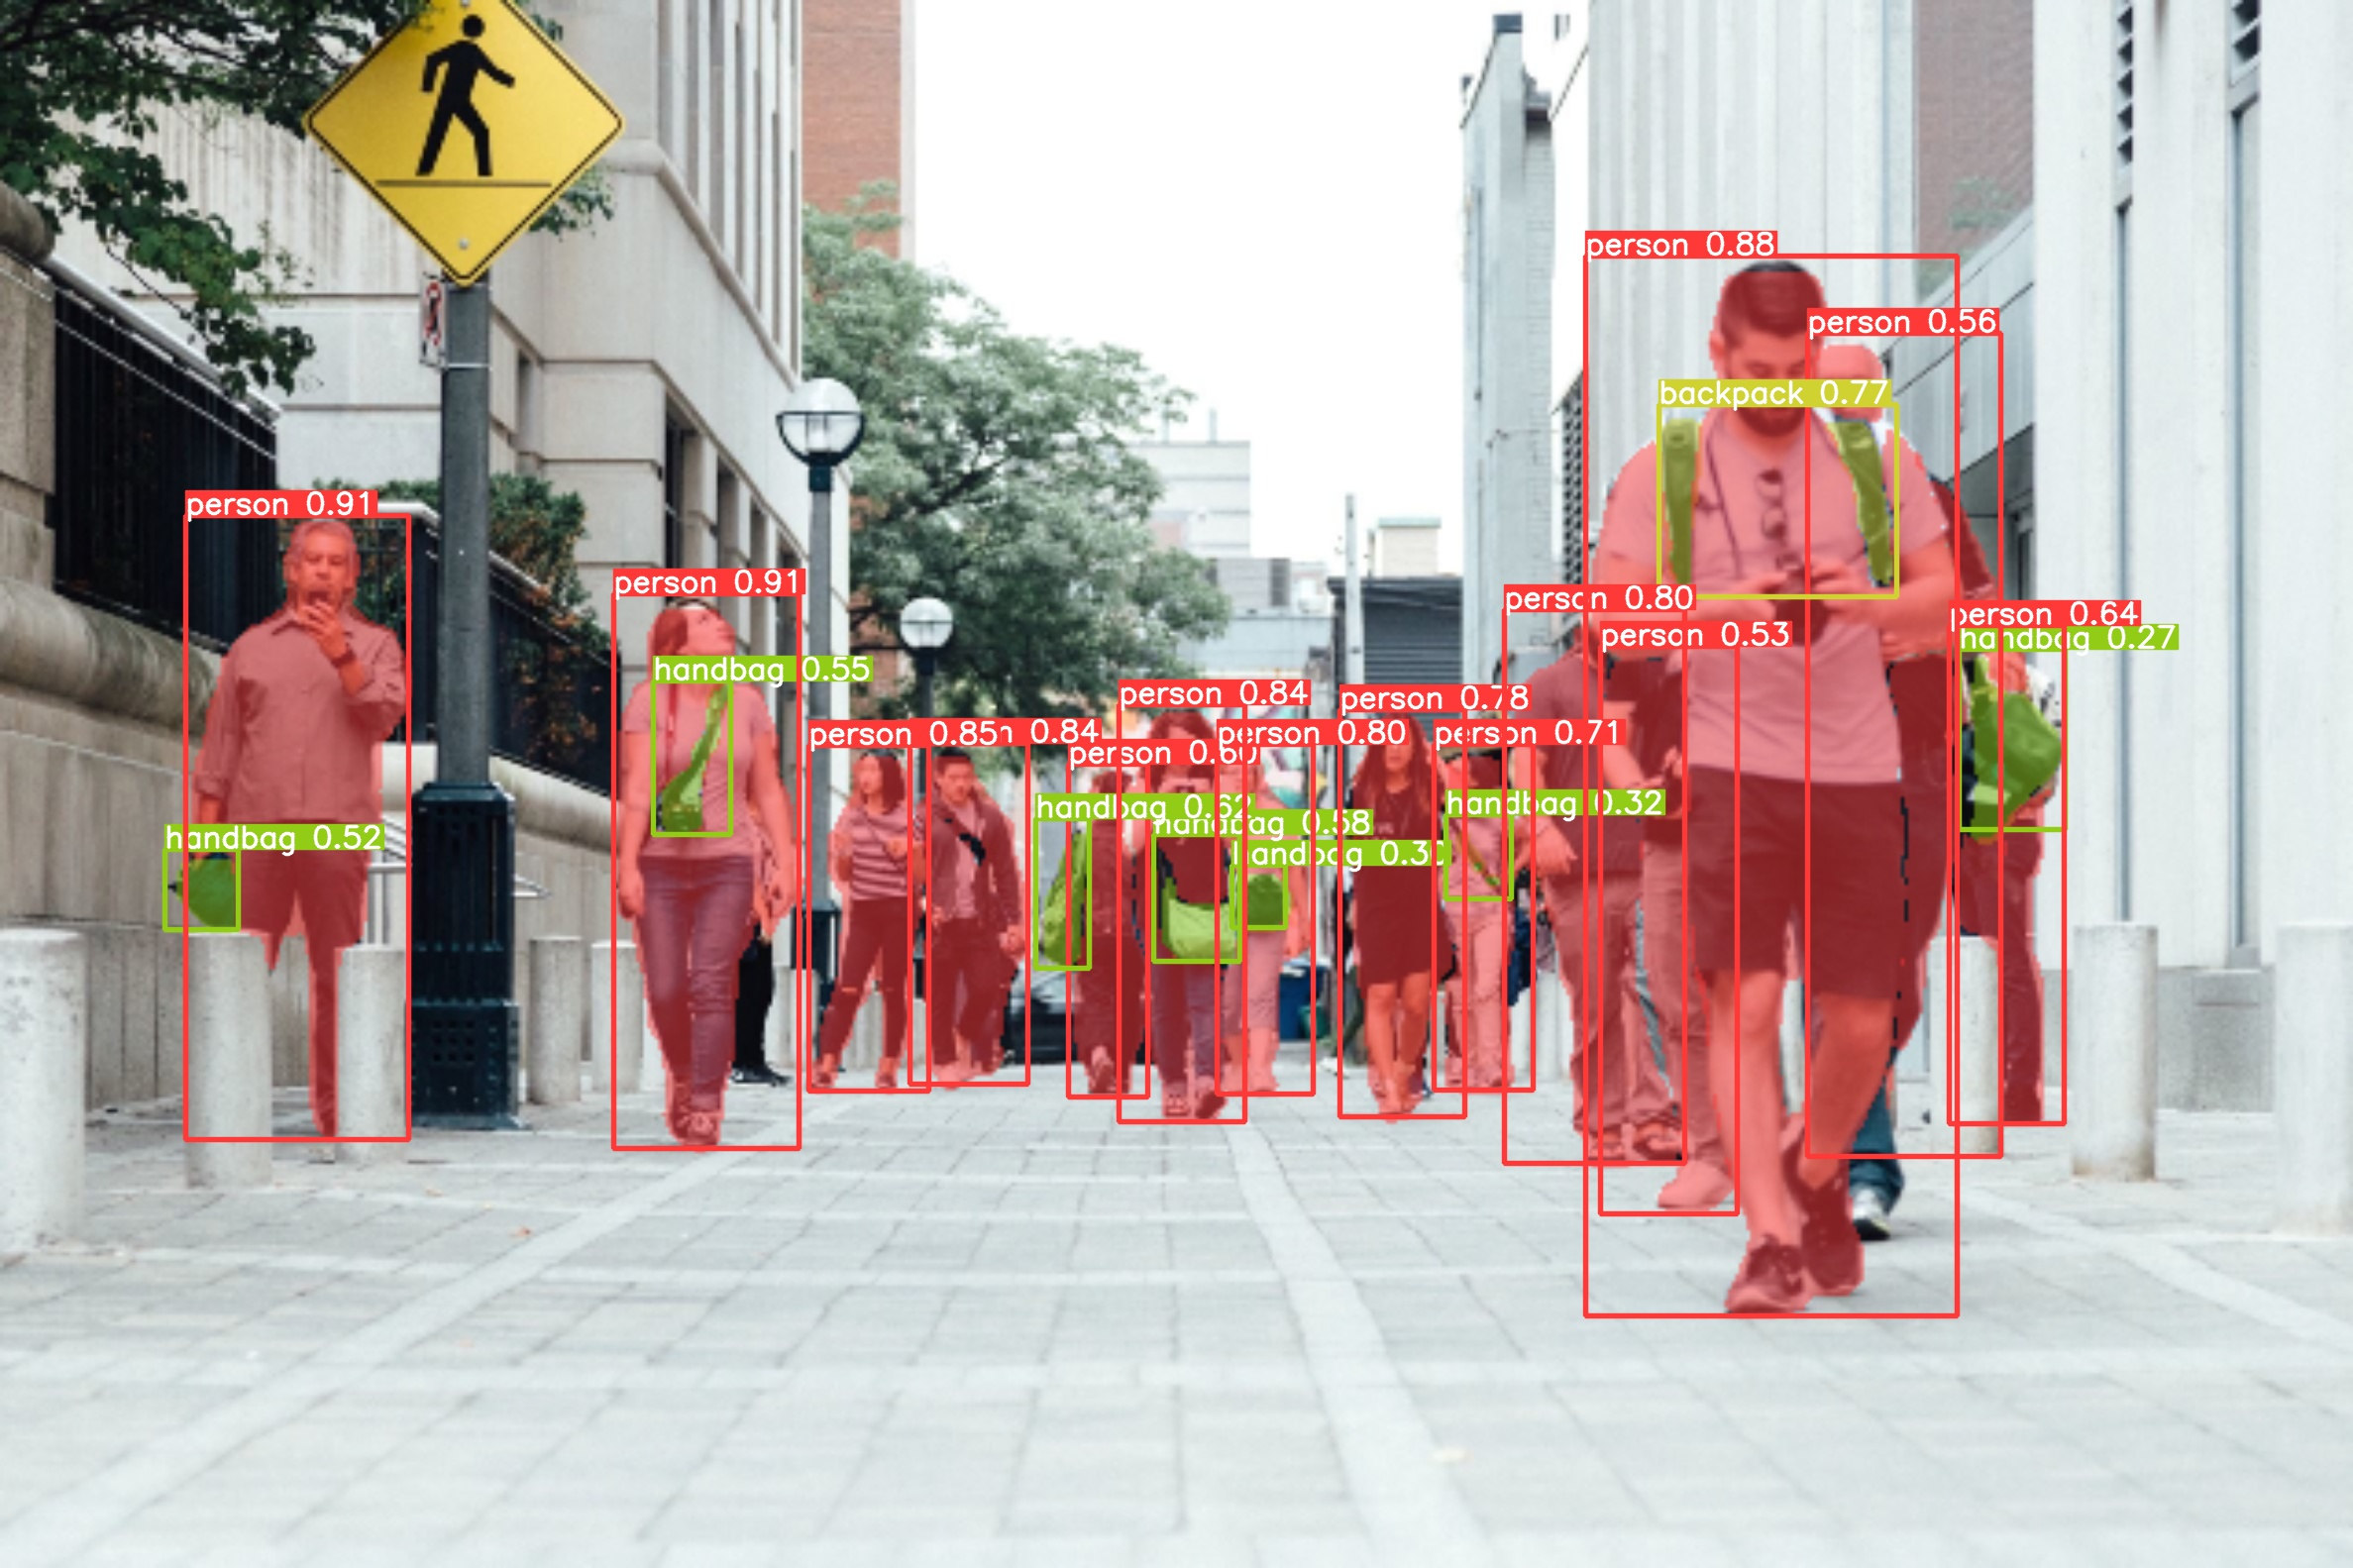

In [13]:
%%time
%cd {HOME}
Image(filename='runs/segment/predict5/2017-04-10-07-10-35.jpg', height=400)

#### SDK (kit de desarrollo de software)

In [14]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://pixnio.com/free-images/2017/04/10/2017-04-10-07-10-35.jpg', conf=0.25)

  0%|          | 0.00/22.8M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.34 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

Found https://pixnio.com/free-images/2017/04/10/2017-04-10-07-10-35.jpg locally at 2017-04-10-07-10-35.jpg
image 1/1 /content/2017-04-10-07-10-35.jpg: 448x640 14 persons, 2 backpacks, 5 handbags, 19.3ms
Speed: 0.6ms pre-process, 19.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


In [15]:
results[0].boxes.xyxy

tensor([[ 618.,  600.,  806., 1162.],
        [1600.,  258., 2001., 1330.],
        [ 185.,  518.,  410., 1148.],
        [ 819.,  752.,  937., 1103.],
        [1351.,  717., 1472., 1125.],
        [ 923.,  751., 1036., 1094.],
        [1131.,  713., 1247., 1129.],
        [1222.,  751., 1325., 1113.],
        [1515.,  607., 1668., 1169.],
        [ 171.,  855.,  240.,  936.],
        [1066.,  746., 1155., 1105.],
        [1447.,  754., 1542., 1106.],
        [1171.,  795., 1252.,  971.],
        [1048.,  826., 1105.,  975.],
        [1608.,  636., 1733., 1181.],
        [ 659.,  695.,  738.,  848.],
        [1968.,  650., 2084.,  832.],
        [1674.,  396., 1910.,  635.],
        [1828.,  332., 2034., 1151.],
        [1972.,  641., 2085., 1133.],
        [1167.,  795., 1256.,  976.]], device='cuda:0')

In [16]:
results[0].boxes.conf

tensor([0.90507, 0.88927, 0.87203, 0.79214, 0.78932, 0.78374, 0.74425, 0.72704, 0.58232, 0.52551, 0.50527, 0.50160, 0.37230, 0.33559, 0.31155, 0.30762, 0.30390, 0.28687, 0.27383, 0.27349, 0.26920], device='cuda:0')

In [17]:
results[0].boxes.cls

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 26.,  0.,  0., 26., 26.,  0., 26., 26., 24.,  0.,  0., 24.], device='cuda:0')

In [18]:
results[0].masks.masks

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

## Conjunto de datos

Se recomienda ampliamente el uso de Roboflow. Enlace al dataset utilizado en este *notebook*:

https://universe.roboflow.com/yolo-v8-oefpj/yolo-v8-instance-segmentation

---

Una vez creado un proyecto, cargado datos y etiquetarlos en la plataforma, se procede a descargar el dataset transformado.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="<your-key>")
project = rf.workspace("yolo-v8-oefpj").project("yolo-v8-instance-segmentation")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.32, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Yolo-v8-Instance-Segmentation-1 in yolov8:: 100%|██████████| 418/418 [00:00<00:00, 2367.14it/s]


### Entrenamiento personalizado

In [ ]:
%%time
%cd {HOME}
!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=25 imgsz=640

/content
Ultralytics YOLOv8.0.32 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Yolo-v8-Instance-Segmentation-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=F

### Evaluación

In [ ]:
!ls {HOME}/runs/segment/train4/

args.yaml					     results.csv
BoxF1_curve.png					     results.png
BoxP_curve.png					     train_batch0.jpg
BoxPR_curve.png					     train_batch165.jpg
BoxR_curve.png					     train_batch166.jpg
confusion_matrix.png				     train_batch167.jpg
events.out.tfevents.1675970215.f9b848a134e5.29981.0  train_batch1.jpg
MaskF1_curve.png				     train_batch2.jpg
MaskP_curve.png					     val_batch0_labels.jpg
MaskPR_curve.png				     val_batch0_pred.jpg
MaskR_curve.png					     weights


/content


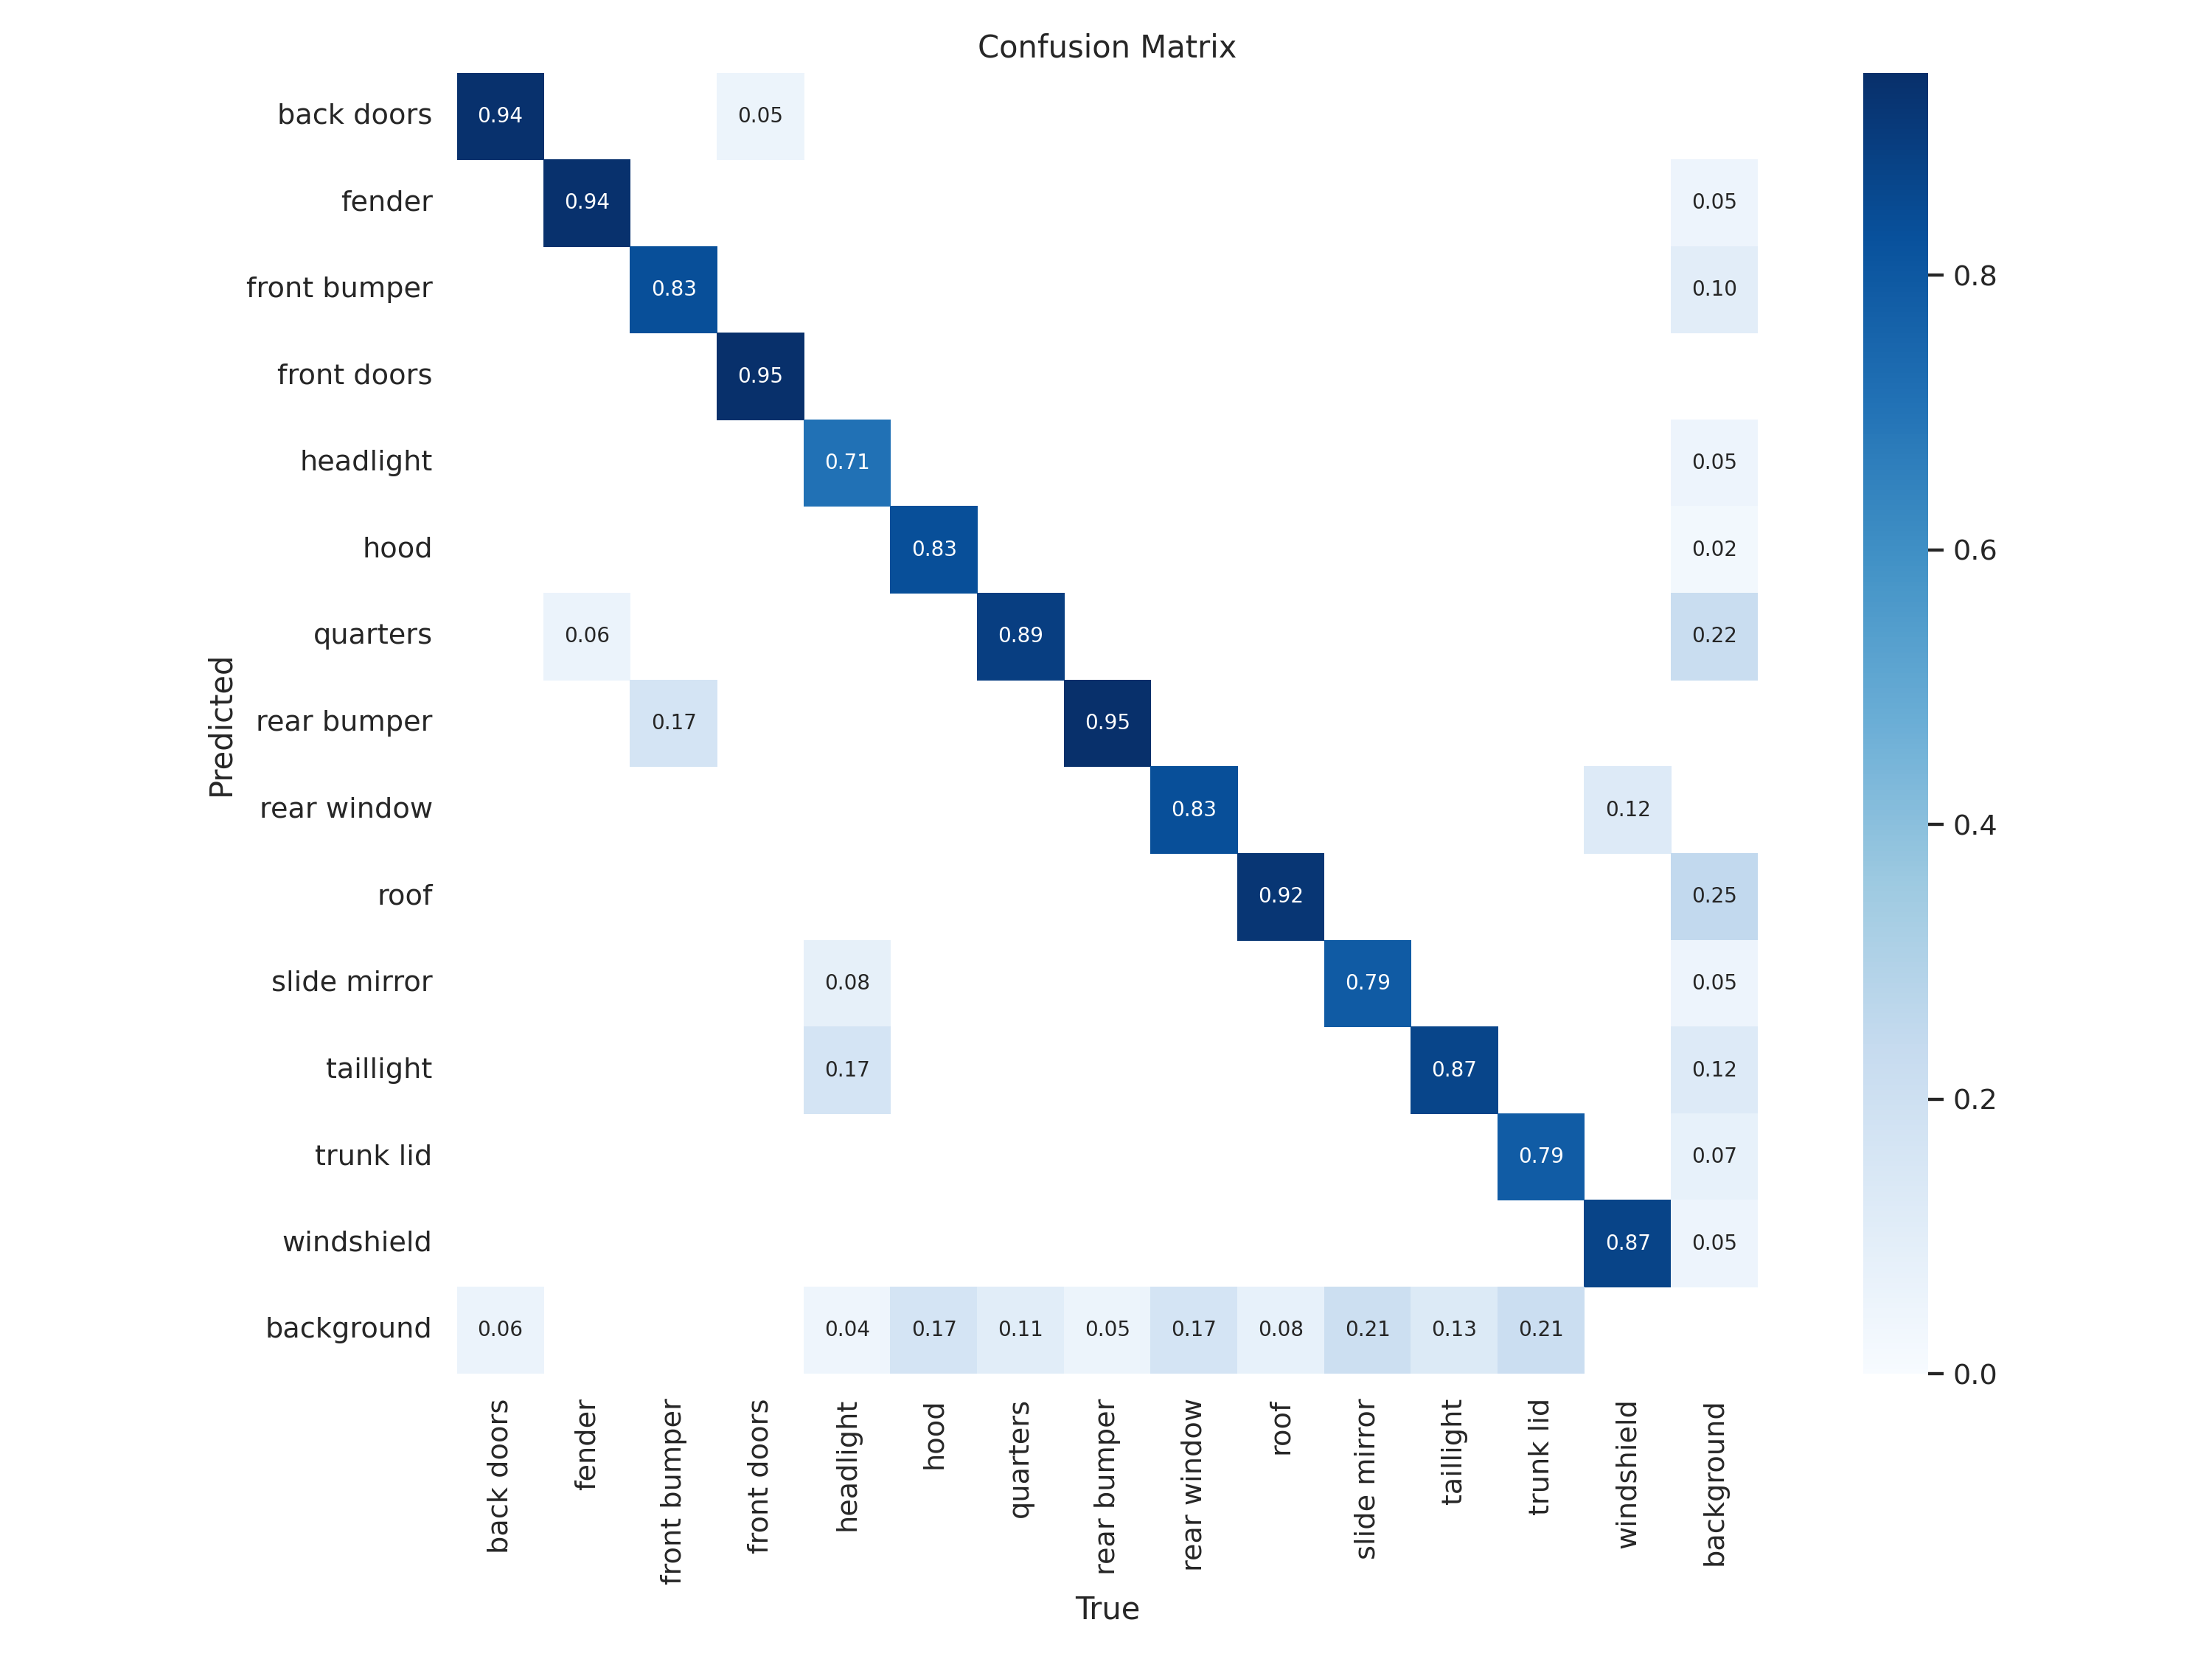

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/confusion_matrix.png', width=600)

/content


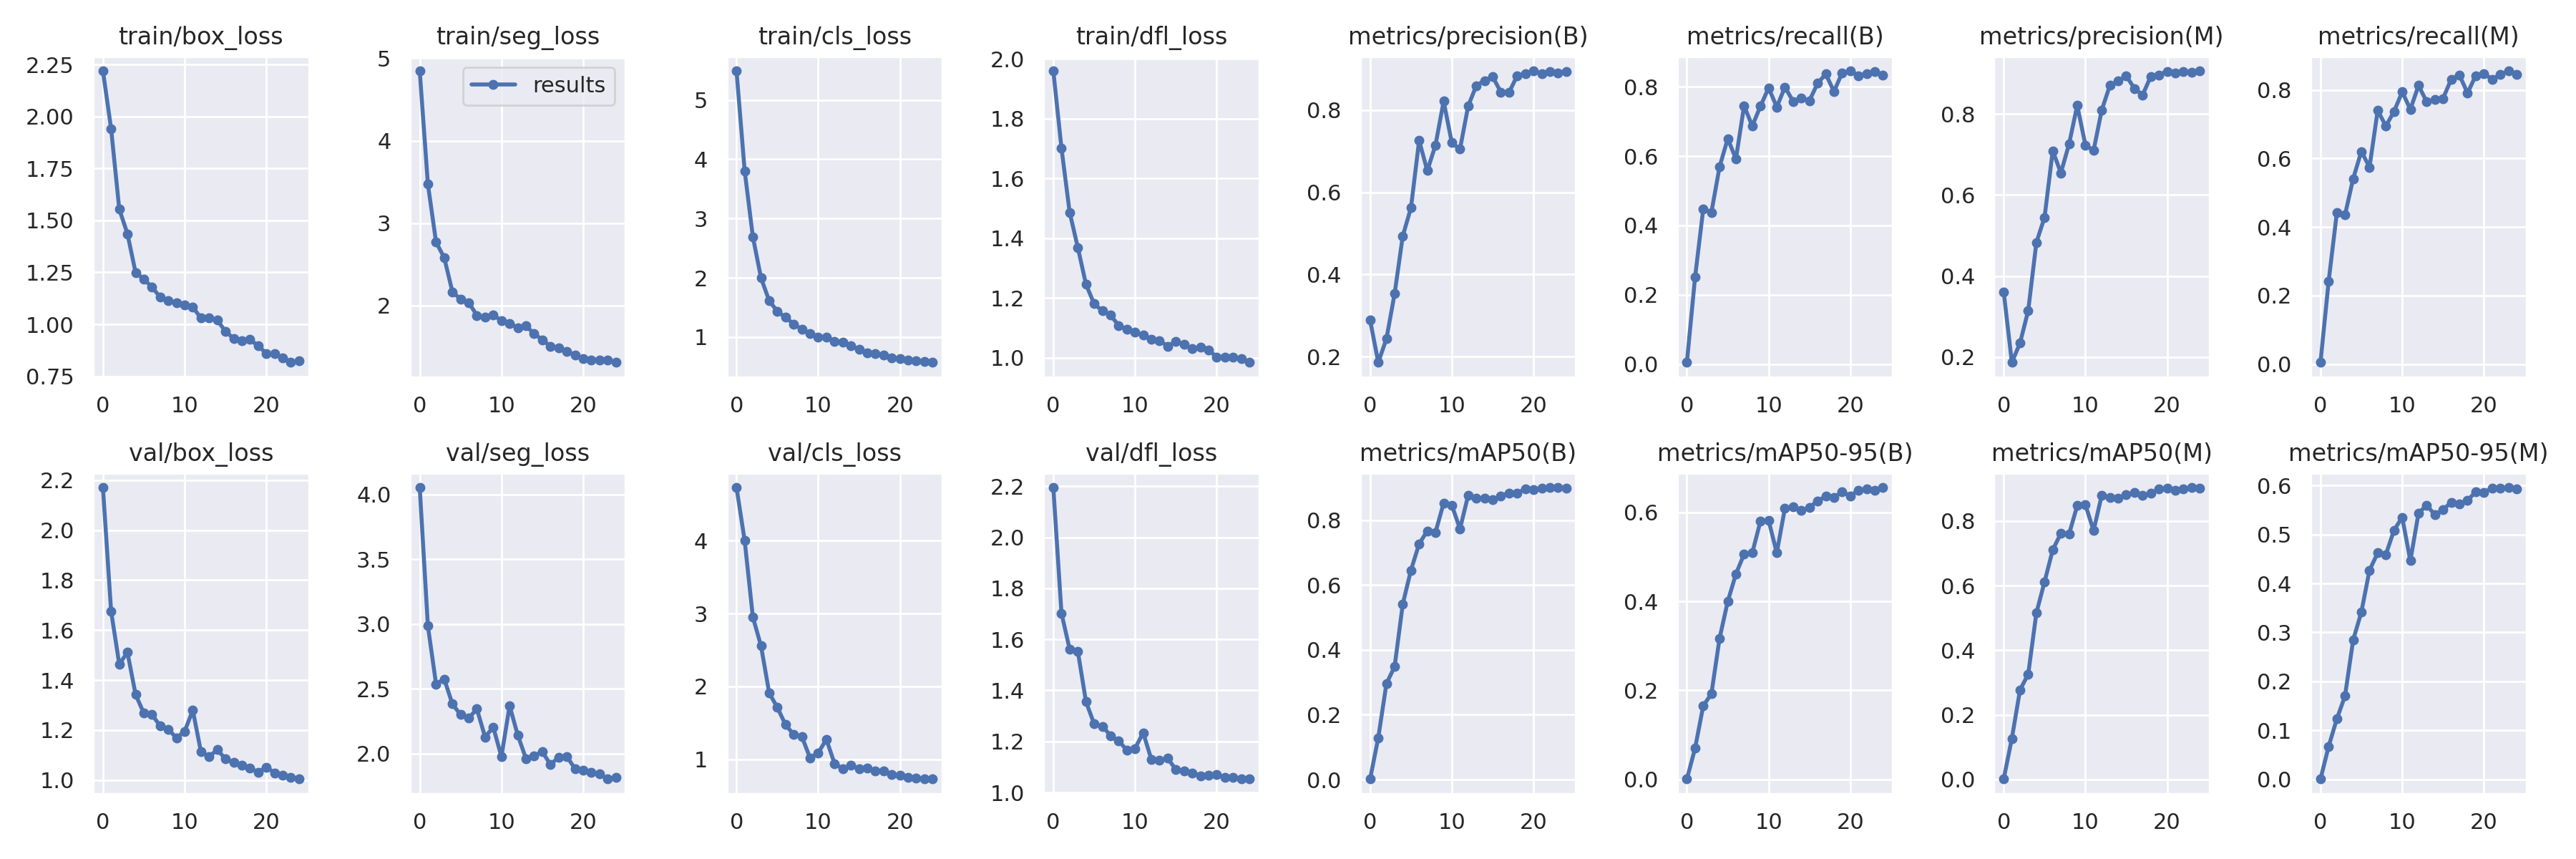

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/results.png', width=600)

### Validaciones

/content


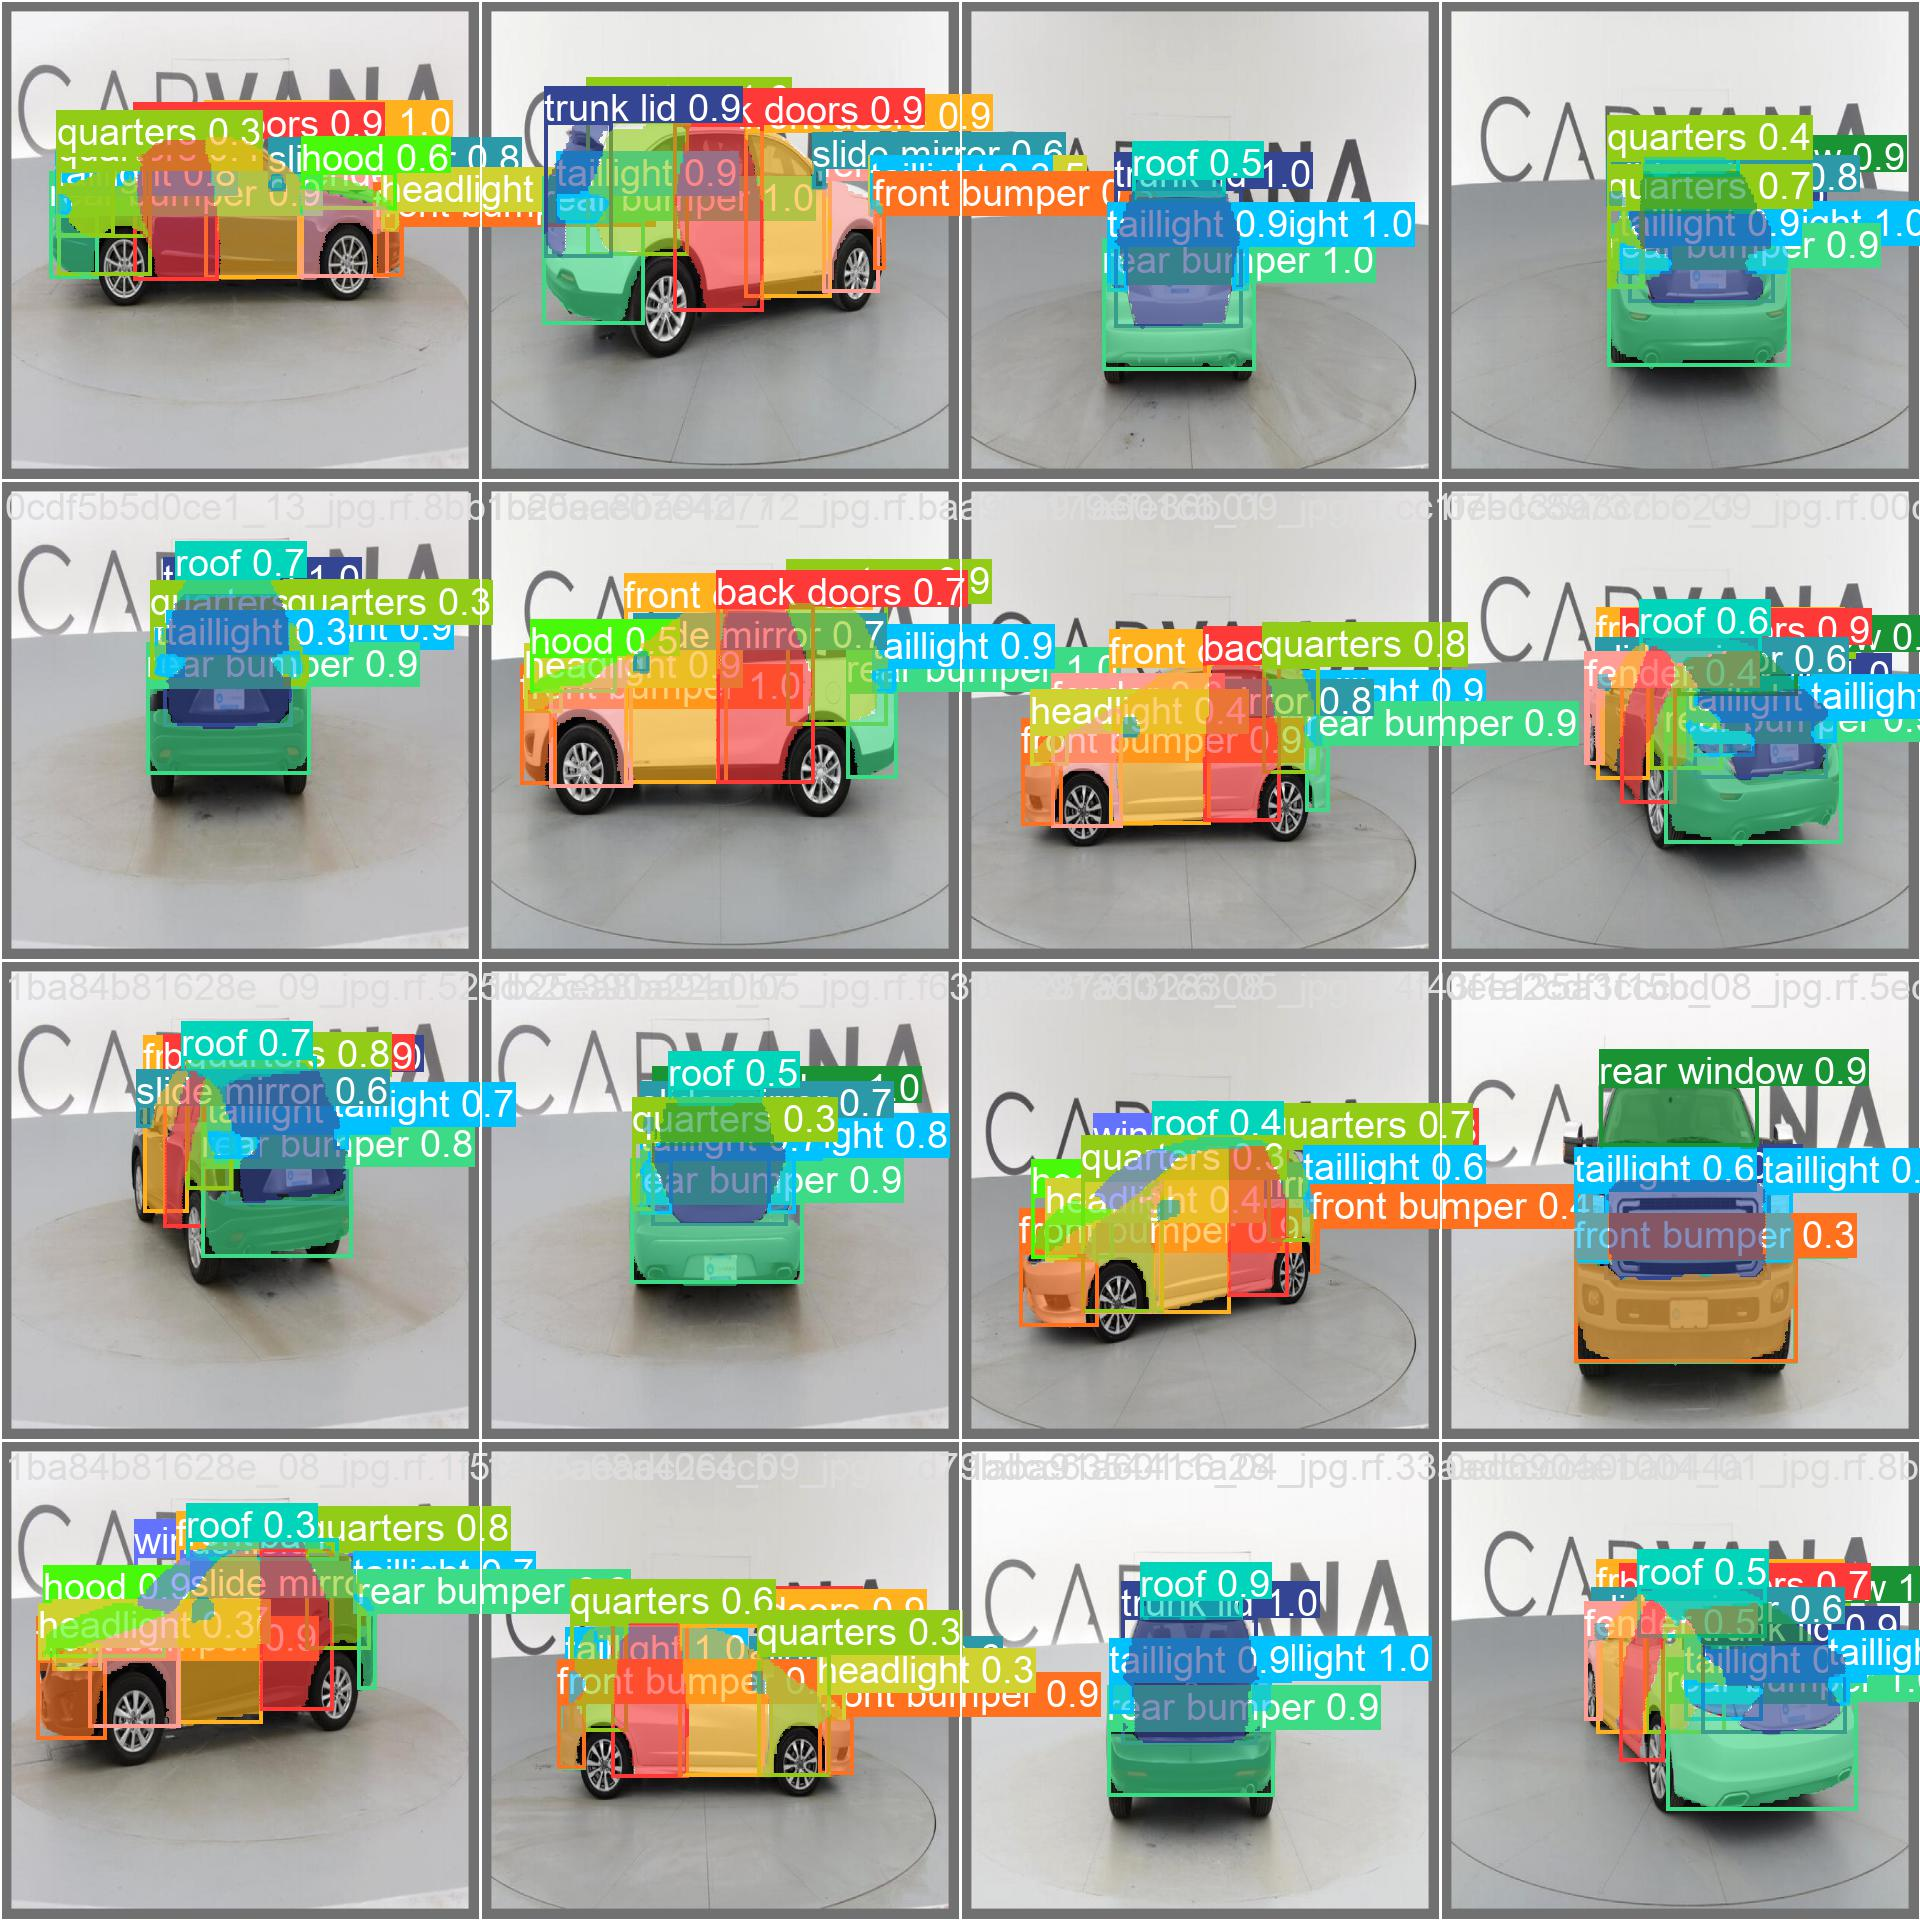

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=segment mode=val model={HOME}/runs/segment/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.32 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785018 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/datasets/Yolo-v8-Instance-Segmentation-1/valid/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100% 26/26 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/Yolo-v8-Instance-Segmentation-1/valid/images/1b25ea8ba94d_05_jpg.rf.f630de28781328308b1f28bb77cc3fb4.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.06it/s]
                   all         26        241      0.885      0.834      0.901      0.655      0.893      0.842      0.901      0.592
            back doors         26         17      0.922      0.941      0.908      0.786      0.922      0.941      0.908      0.681
                fender         26         17      0.939      0.90

### Inferencia

In [ ]:
%%time
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.32 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785018 parameters, 0 gradients, 42.5 GFLOPs

image 1/13 /content/datasets/Yolo-v8-Instance-Segmentation-1/test/images/0cdf5b5d0ce1_04_jpg.rf.e7ba20925af2e74ea1c27a14fb43aa8d.jpg: 640x640 1 back doors, 1 fender, 1 front bumper, 1 front doors, 1 headlight, 1 hood, 2 quarterss, 1 rear bumper, 1 roof, 1 slide mirror, 1 taillight, 1 windshield, 21.4ms
image 2/13 /content/datasets/Yolo-v8-Instance-Segmentation-1/test/images/0cdf5b5d0ce1_12_jpg.rf.45f6e06f76aa186258bbe1b600782fc9.jpg: 640x640 1 back doors, 1 fender, 1 front bumper, 1 front doors, 1 hood, 2 quarterss, 1 rear bumper, 1 rear window, 1 roof, 1 slide mirror, 2 taillights, 1 trunk lid, 1 windshield, 21.4ms
image 3/13 /content/datasets/Yolo-v8-Instance-Segmentation-1/test/images/0d53224da2b7_12_jpg.rf.d568c8da0847533f7add497e3d8021c8.jpg: 640x640 1 fender, 1 front bumper, 1 front doors, 2 hoods, 

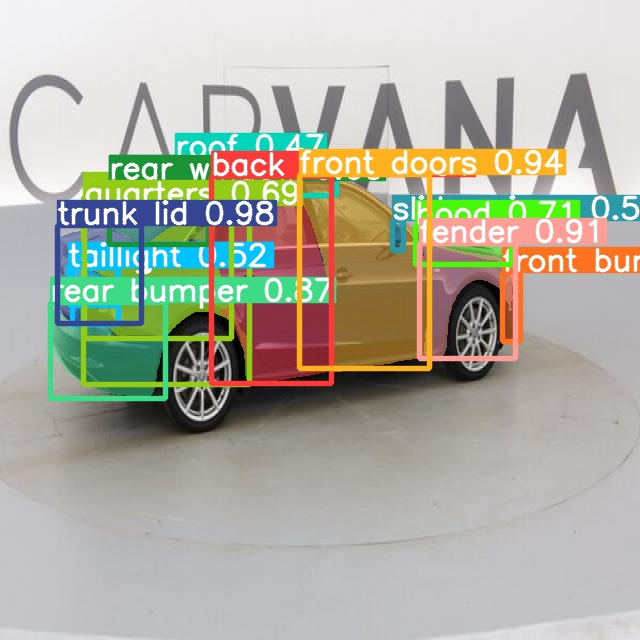

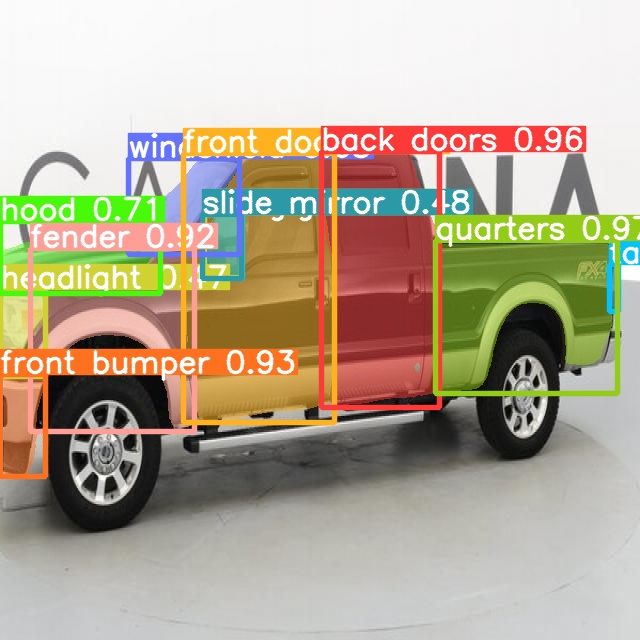

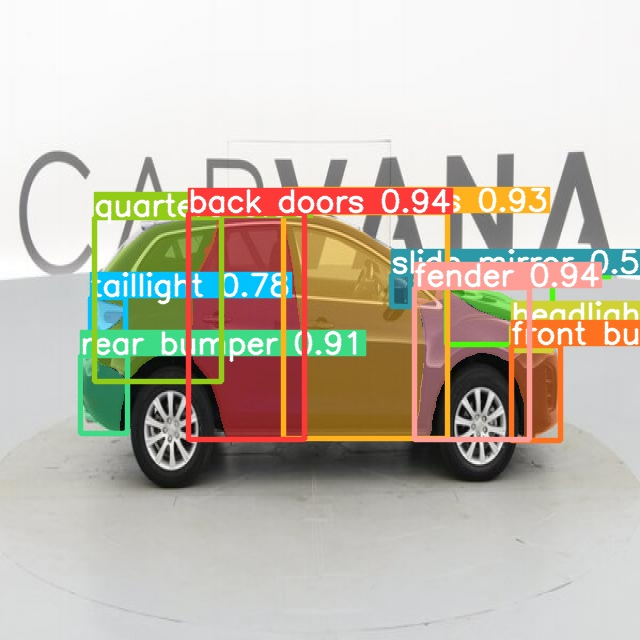

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

**Referencias**

* https://paperswithcode.com/task/instance-segmentation
* https://github.com/roboflow/notebooks
* https://universe.roboflow.com/
* https://docs.ultralytics.com/python/
* https://arxiv.org/abs/1506.02640